![](header2.jpg)

# Satellite Attitude Dynamics and Control

Kevin J. Walchko, Phd

20 June 2022

---

This will just cover some basic derivation of the dynamics and simple control law.

## References

- B. Wie, *Space Vehicle Dynamics and Control*, Second Edition, American Institute of Aeronautics and Astronautics, Reston, VA, 2008, Chapter 6
- M. J. Sidi, *Spacecraft Dynamics and Control*, Cambridge University Press, New York, 2014. Appendix A
- Janusz Narkiewicz, Mateusz Sochacki, Bartłomiej Zakrzewski, "Generic Model of a Satellite Attitude Control System", International Journal of Aerospace Engineering, vol. 2020, Article ID 5352019, 17 pages, 2020. https://doi.org/10.1155/2020/5352019
- Bani Younes, A.; Mortari, D. "Derivation of All Attitude Error Governing Equations for Attitude Filtering and Control". Sensors 2019, 19, 4682. https://doi.org/10.3390/s19214682
- Solà, Joan. (2015). Quaternion kinematics for the error-state KF. https://hal.archives-ouvertes.fr/hal-01122406v2
- Jonsson, Lisa, "Simulations of Satellite Attitude Maneuvers - Detumbling and Pointing", 2019, https://ltu.diva-portal.org/smash/get/diva2:1298491/FULLTEXT03.pdf
- walchko: [Quaternions](../quaternions/quaternions.ipynb)

## Terms and Definitions

| Variable | Units   | Definition        |
|----------|---------|:-------------------|
| $h_w$    | N-m-s   | Wheel angular momentum |
| $H$      | N-m-s   | Angular momentum of a rigid body |
| $J$      | kg-$m^2$ | The inertia matrix of a rigid body |
| $J_s$    | kg-$m^2$ | The inertia matrix of the satellite |
| $q$      | N/A     | Satellite quaternion which is a Hamilton quaternion and gives the rotation from body to inertial |
| $q_d$    | N/A    | Satellite's desired quaternion orientation |
| $q_e$    | N/A    | Quaternion error between a satellite's current orientation and its desired orientation |
| $\omega^{B/A}$ | rad/s | Angular rotation rate of a rigid body B relative to reference frame A (which is generally your LVLH frame) |
| $\omega^{B/N}$ | rad/s | Angular rotation rate of a rigid body B relative to N (which is your Newtonian inertial frame generally referenced on Earth) |
| $\tau$   | N-m | Generic control or disturbance torque |
| $\tau_c$   | N-m | Control torque |
| $\tau_{ext}$   | N-m | External disturbance torque |

| Reference Frame | Definition |
|---|:---|
| $\mathcal{F}_A$ | A local vertical, local horizontal reference frame (LVLH), x-axis in-track (velocity direction), z-axis Earth pointing (nadir), y-axis perpendicular to the orbital frame |
| $\mathcal{F}_B$ | Body frame of the satellite with the origin located at the center of mass |
| $\mathcal{F}_N$ | A Newtonian inertial reference frame located with its origin at the center of the Earth and for all intents and purposes is an inertial reference frame |

# Simple Attitude Dynamics

![](pics/orbit.png)

## Angular Momentum

Looking at Bong Wie Chapter 6, we can derive equation 6.46 (p. 634) as:

$$
\begin{align}
\dot H &= \frac {\partial H}{dt} \bigg|_N = \tau \\
H &= J \dot \omega
\end{align}
$$

These dynamics are derived in a Newtonian inertial frame ($\mathcal{F}_N$).

Unfortunately this isn't useful since, the inertia matrix ($J$) is defined in the fixed inertial frame. Thus, as the satellite rotates, the inertia matrix changes w.r.t. the inertial frame axes. It would be more useful to define the inertia matrix w.r.t. a body fixed frame ($\mathcal{F}_B$) so $J$ is constant.

$$
\begin{align}
\dot H &= \frac {\partial H}{dt} \bigg|_N = \frac {\partial H}{dt} \bigg|_B + \omega \times H \\
J \dot \omega + \omega \times J \omega &= \tau \\
\dot \omega &= J^{-1} \left( \tau - \omega \times J \omega \right)
\end{align}
$$

where $\omega$ is the body rotation rate with respect to $\mathcal{F}_N$.

## Local Vertical Local Horizontal (LVLH) Frame

Generally, 

$$
\mathcal{F}_A = \begin{bmatrix} \hat a_1 && \hat a_2 && \hat a_3 \end{bmatrix}^T
$$ 

where $\hat a_1$ points in track (direction of travel), $\hat a_3$ points nadir (towards Earth), and $\hat a_2$ completes the square ($\hat a_2 = \hat a_3 \times \hat a_1$).

## Attitude Representation

Here we are using the Hamilton definition of a quaternion.

$$
\begin{align}
q &= \begin{bmatrix} w & x & y & z \end{bmatrix} = \begin{bmatrix} q_w & q_{x,y,z} \end{bmatrix} \\
\mathbb{Re}(q) &= q_w = \cos (\theta / 2) \\
\mathbb{Im}(q) &= q_{x,y,z} = \hat e \sin (\theta / 2) \\
q^{-1} &= q^* = \begin{bmatrix} q_w & -q_x & -q_y & -q_z \end{bmatrix}
\end{align}
$$

where the quaternion represents a rotation ($\theta$) about an axis ($\hat e$). The quaternion is also composed of a real part ($q_w$) and an imaginary part ($q_{x,y,z}$).

## Attitude Control

The $q_e$ is the quaternion error:

$$
q_e = q_d^{-1} \otimes q
$$

where $q_d$ is the desired attitude and $q$ is the current attitude. Now, Jonsson shows the control command ($u$) for a PD controller (eqns 37) is:

$$
\begin{align}
\newcommand{\sgn}[1]{sgn \left( #1 \right)}
u &= -K_p \sgn{q_{e:w}} q_{e:xyz} - K_d \omega_e \\
\omega_e &= \omega - \omega_d
\end{align}
$$

where $q_{e:w|xyz}$ is either the real or imaginary part of the error quaternion, $\omega_e$ is the rate error, $\omega_d$ is the desired rate, $K_p$ is the proportional control gain and the $K_d$ is the derivative control gain. Both gains are posative definate.

Another controller used by Jonsson (eqn 40) is:

$$
u = -K_p \sgn{q_{e:w}} q_{e:xyz} - K_d (1 \pm q_{e:xyz}^T q_{e:xyz}) \omega_e
$$

where the minus is used when $1 - q_{e:xyz}^T q_{e:xyz} = q_{e:w}^2$, which should give the shortest distance.

There are many other types of attitude control, but one more based on a PID controller is:

$$
\begin{align}
u &= -K_p \sigma - K_d \omega_e - K_i \int \sigma dt \\
\sigma &= 2 q_{e:w} ( q_{e:xyz} )
\end{align}
$$

# Simple Torque Control

This is a simple satellite model. The assumption is, the commanded 
torques are feed into the model.

In [1]:
# reload library
%load_ext autoreload
%autoreload 2

In [215]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp as rk45
from squaternion import Quaternion
from helper import plotStates, plotControl

In [249]:
# desired quaternion
qd = Quaternion.from_euler(40,30,-40,degrees=True)

qe = qd.conjugate * Quaternion()
print(f"Error quaternion: {qe:.4f}")
print(f"  Rotation axis: {qe.axis}")
print(f"  Rotation angle: {qe.angle*180/np.pi:.4f} deg")

Error quaternion: Quaternion(w=0.8227, x=-0.3936, y=-0.1156, z=0.3936)
  Rotation axis: (-0.6923482794452575, -0.2032430070097958, 0.6923482794452575)
  Rotation angle: 69.2965 deg


In [347]:
class Satellite:
    """
    This is a simple stupid satellite model. The assumption is, the commanded 
    torques are feed into the model. The torques could come from some external
    forces like thrusters.
    """
    J = np.diag([10,10,10])
    Tlim = 0.9 # Nm
    Hlim = 1.5 # Nms
    dz = 0.05  # Nm
    
    def dynamics(self, t, state, u):
        # state = [q(r,x,y,z), w]
        # u = torques(3)

        J = self.J
        q = Quaternion(*state[:4])
        w = state[4:]
        qw = Quaternion(0, *w)

        ret = np.zeros(7)
        ret[:4] = 0.5*q*qw
        ret[4:] = np.linalg.inv(J) @ (u - np.cross(w, J @ w))
        return ret
    
    def torqueLimit(self, u, limit=None, deadzone=None):
        # dead zone around 0
        # max torque limit
        if limit is None: limit = self.Tlim
        if deadzone is None: deadzone = self.dz
        
        for i in range(3):
            if -deadzone < u[i] < deadzone:
                u[i] = 0.0
            elif u[i] > limit:
                u[i] = limit
            elif u[i] < -limit:
                u[i] = -limit
        return u

In [348]:
ti = []
yi = []
ui = []
err = []
errdot = []

sat = Satellite()

step = 0.01
t = 0

# [q, w]
y = np.zeros(7)
y[:4] = Quaternion() # set starting quaternion

for i in range(2000):
    u = np.zeros(3)
    q = Quaternion(*y[:4])
    qe = qd.conjugate * q
    axis = np.array(qe.vector)
    u = -10 * axis - 10*y[4:]
    
    # I am using this as an external torque, not wheels
    u = sat.torqueLimit(u, deadzone=0.0)
    
    y = rk45(sat.dynamics, [t, t+step], y, args=(u,))
    
    if y.success == False:
        print("Oops")
        
    y = y.y[:,-1]
    yi.append(y)
    t += step
    ti.append(t)
    ui.append(u)
    err.append(qe)
    errdot.append(y[4:])
    
yi = np.array(yi)
ti = np.array(ti)
ui = np.array(ui)
err = np.array(err)
errdot = np.array(errdot)

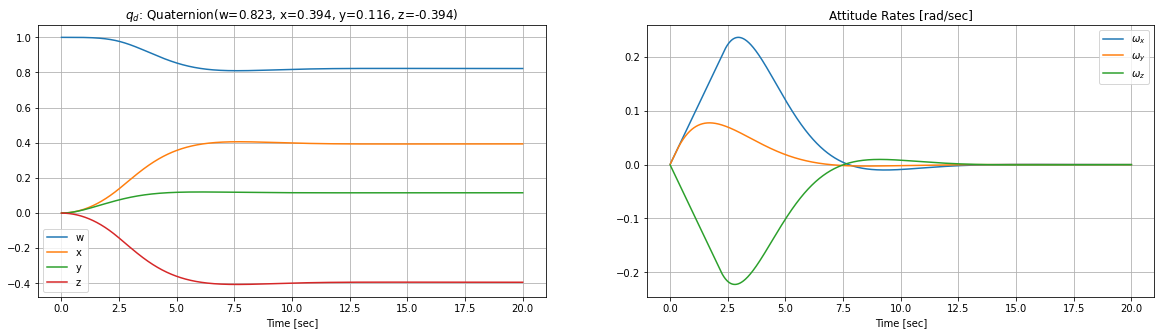

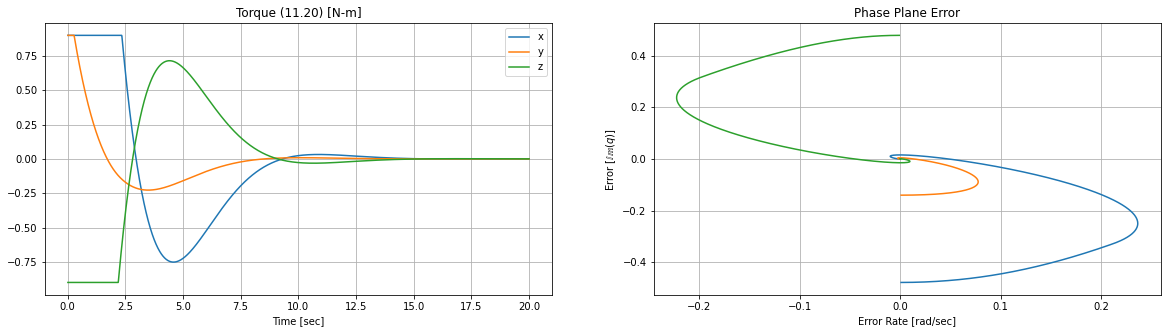

In [350]:
plotStates(ti,yi,qd)
plotControl(ti,ui,err,errdot,step)

# Attitude Dynamics with Wheel Dynamics

Now we can take the dynamics from the previous section and change it a little:

$$
H_{total} = H_s + h_w = J_s \omega + h_w
$$

where $H_s$ is the satellite momentum, $J_s$ is the satellite inertia, $h_w$ is the wheel angular momentum. Substitute this combine momentum term into the above equations and you get:

$$
\begin{align}
\dot H_{total} + \omega \times H_{total} &= \tau_{ext} \\
J_s \dot \omega + \dot h_w + \omega \times J_s \omega + \omega \times h_w &= \tau_{ext} \\
\dot \omega &= J_s^{-1} \left( \tau_{ext} - \dot h_w - \omega \times J_s \omega - \omega \times h_w \right)
\end{align}
$$

From conservation of momentum, we know $\dot h_w = - \tau_c$ where $\tau_c$ is the control torques produced by the wheels. Replacing this in to the above equation to get:

$$
\dot \omega = J_s^{-1} \left( \tau_{ext} + \tau_c - \omega \times J_s \omega - \omega \times h_w \right)
$$

## Reaction Wheels

<table style="text-align:center">
    <tr>
        <td><img src="pics/a.png"></td>
        <td><img src="pics/b.png"></td>
        <td><img src="pics/c.png"></td>
        <td><img src="pics/d.png"></td>
    </tr>
    <tr>
        <td>(a) orthogonal</td>
        <td>(b) pyramidal</td>
        <td>(c) tetrahedral</td>
        <td>(d) skew</td>
    </tr>
</table>

The wheels impart momentum on to the satellite depending on how they are orientated:

$$
h_B = A_w h_w \\
\begin{bmatrix}
    h_x \\
    h_y \\
    h_z
\end{bmatrix}_B = \begin{bmatrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    a_{31} & a_{32} & a_{33} \\
\end{bmatrix} 
\begin{bmatrix}
    h_{w1} \\
    h_{w2} \\
    h_{w3} \\
    h_{w4}
\end{bmatrix}
$$

If the wheels don't align with the body, then the $A_w$ elements would be composed of sines and cosines depending on how the wheels are oriented. When the wheels are aligned with $\mathcal{F}_B$ (body axes), the $A_w$ becomes:

$$
A_w = \begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 \\
\end{bmatrix} 
$$

However, if any one wheel fails, then you lose control in that axis. So typically, four wheels are used and arranged such that if any one wheel fails, then the remaining three have some control authority in that axis to cover for the failed wheel.

$$
A_w = \begin{bmatrix}
    a_{11} & a_{12} & a_{13} & a_{14} \\
    a_{21} & a_{22} & a_{23} & a_{24} \\
    a_{31} & a_{32} & a_{33} & a_{34} \\
\end{bmatrix} 
$$

If the wheels are setup in the skew configuration shown above, you align three wheels with $\mathcal{F}_B$ and the fourth wheel is canted such that it can effect all axes, this give you redundacy. Then you have:

$$
A_w = \begin{bmatrix}
    1 & 0 & 0 & 1/\sqrt{3} \\
    0 & 1 & 0 & 1/\sqrt{3} \\
    0 & 0 & 1 & 1/\sqrt{3} \\
\end{bmatrix} 
$$

Another popular configuration shown above is the pyramid configuration. Here, all four wheels are tilted by some angle $\beta$ so they produce control authority in the z-axis (Sidi, pg 168). One potential orientation is $\beta = 45^{\circ}$.

$$
A_w = \begin{bmatrix}
    cos\beta &        0 & -cos\beta & 0 \\
           0 & cos\beta & 0         & -cos\beta \\
    sin\beta & sin\beta & sin\beta  & sin\beta \\
\end{bmatrix} \\
\cos(45^{\circ}) = \sin(45^{\circ}) = \frac {1}{\sqrt{2}}
$$

In [351]:
class SatelliteWheels(Satellite):
    """
    This is a slightly more realistic satellite model. In addition to 
    external torques, it also accounts for momentum within the satellite
    generated by the wheels.
    """
    def dynamics(self, t, state, u):
        # state = [q(r,x,y,z), w, h_w]
        # u = torques(3)

        J = self.J
        q = Quaternion(*state[:4])
        w = state[4:7]
        h = state[7:10]
        qw = Quaternion(0, *w)

        ret = np.zeros(10)
        ret[:4] = 0.5*q*qw
        ret[4:7] = np.linalg.inv(J) @ (u - np.cross(w, J @ w) - np.cross(w, h))
        ret[7:10] = -u
            
        return ret
    
    def momentumLimit(self, y, limit=None):
        # max momentum limit
        if limit is None: limit = self.Hlim
        
        for i in range(7,10):
            if y[i] > limit:
                y[i] = limit
            elif y[i] < -limit:
                y[i] = -limit
        return y

In [352]:
ti = []
yi = []
ui = []
err = []
errdot = []

sat = SatelliteWheels()

step = 0.01
t = 0

# [q, w, h_w]
y = np.zeros(10)
y[:4] = Quaternion() # set starting quaternion

# desired quaternion
qd = Quaternion().from_euler(40,30,-40,degrees=True)

for i in range(2000):
    u = np.zeros(3)
    q = Quaternion(*y[:4])
    qe = qd.conjugate * q
    axis = np.array(qe.vector)
    u = -10 * axis - 10*y[4:7]
    
    u = sat.torqueLimit(u, deadzone=0.0)
    y = sat.momentumLimit(y)
    
    y = rk45(sat.dynamics, [t, t+step], y, args=(u,))
    
    if y.success == False:
        print("Oops")
        
    y = y.y[:,-1]
    yi.append(y)
    t += step
    ti.append(t)
    ui.append(u)
    err.append(qe)
    errdot.append(y[4:7])
    
yi = np.array(yi)
ti = np.array(ti)
ui = np.array(ui)
err = np.array(err)
errdot = np.array(errdot)

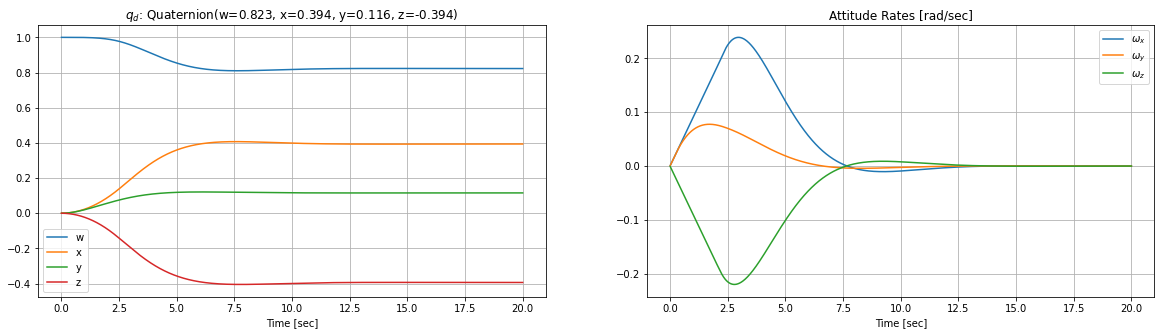

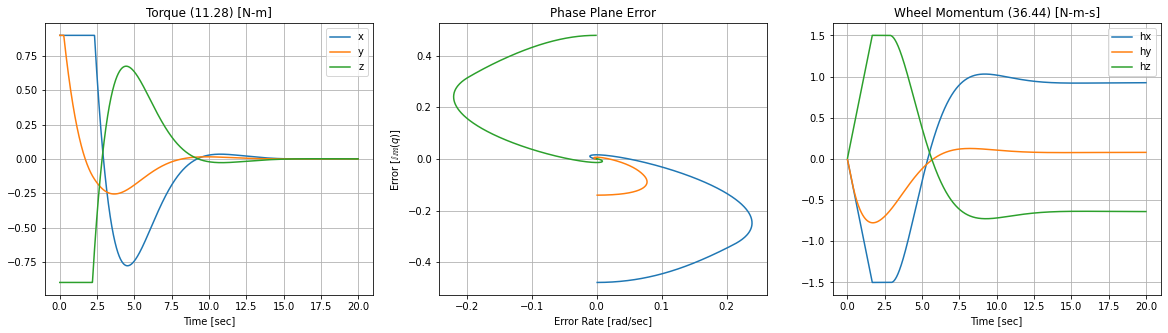

In [353]:
plotStates(ti,yi,qd)
plotControl(ti,ui,err,errdot,step,yi[:,7:10])

Looking at the momentum plot (lower right), we can see the wheels storing lots of momentum (36.44 N-m-s) over time.

Let's try this again, but with the other controller shown above.

In [354]:
ti = []
yi = []
ui = []
err = []
errdot = []

sat = SatelliteWheels()

step = 0.01
t = 0

# [q, w, h_w]
y = np.zeros(10)
y[:4] = Quaternion() # set starting quaternion

# desired quaternion
qd = Quaternion().from_euler(40,30,-40,degrees=True)

for i in range(2000):
    u = np.zeros(3)
    q = Quaternion(*y[:4])
    qe = qd.conjugate * q
    axis = np.array(qe.vector)
    
    # this part is different from above #######
    aa = np.dot(axis,axis)
    if 1-aa == q.w**2:
        kd = 10*(1-aa)
    else:
        kd = 10*(1+aa)
        
    u = -10 * axis - kd*y[4:7]
    ############################################
    
    u = sat.torqueLimit(u, limit=0.9, deadzone=0.0)
    y = sat.momentumLimit(y, 1.5)
    
    y = rk45(sat.dynamics, [t, t+step], y, args=(u,))
    
    if y.success == False:
        print("Oops")
        
    y = y.y[:,-1]
    yi.append(y)
    t += step
    ti.append(t)
    ui.append(u)
    err.append(qe)
    errdot.append(y[4:7])
    
yi = np.array(yi)
ti = np.array(ti)
ui = np.array(ui)
err = np.array(err)
errdot = np.array(errdot)

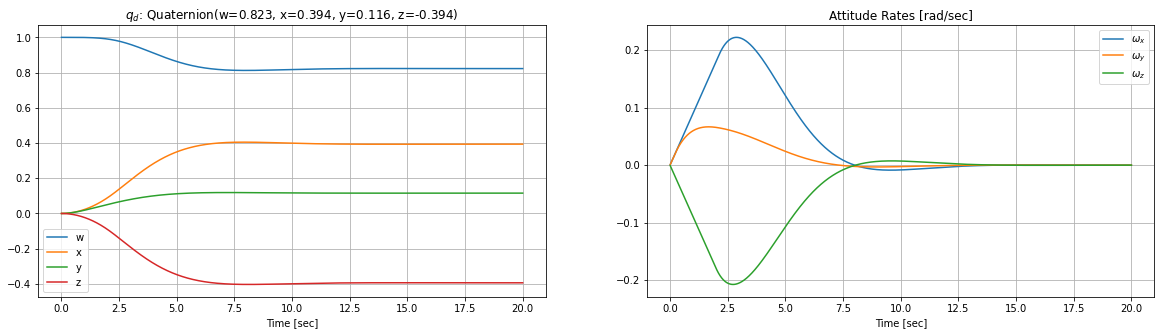

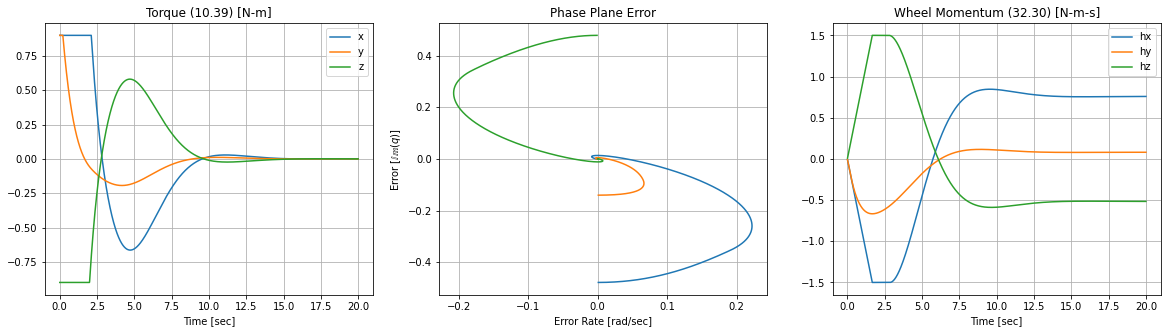

In [356]:
plotStates(ti,yi,qd)
plotControl(ti,ui,err,errdot,step,yi[:,7:10])

If you look at the numbers in the Torque and Wheel Momentum plot titles, you will see the second controller required less torque and has less momentum needing to be dumped.